<a href="https://colab.research.google.com/github/hardik-vala/unicorn-namegen/blob/main/unicorn_namegen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
import torch

In [255]:
!wget https://raw.githubusercontent.com/hardik-vala/unicorn-namegen/main/names.txt

--2023-02-18 02:11:01--  https://raw.githubusercontent.com/hardik-vala/unicorn-namegen/main/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8257 (8.1K) [text/plain]
Saving to: ‘names.txt.4’

names.txt.4         100%[===================>]   8.06K  --.-KB/s    in 0s      

2023-02-18 02:11:02 (36.1 MB/s) - ‘names.txt.4’ saved [8257/8257]



In [256]:
names = open('names.txt', 'r').read().splitlines()

In [257]:
len(names)

854

In [258]:
min_name_len = min(len(n) for n in names)
min_name_len

2

In [259]:
max_name_len = max(len(n) for n in names)
max_name_len

34

In [260]:
[n for n in names if len(n) == min_name_len]

['9F', 'G2', 'Ro']

In [261]:
[n for n in names if len(n) == max_name_len]

['LinkSure Network (WiFi Master Key)']

In [262]:
b = {}
for n in names:
  chs = ['<S>'] + list(n) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [263]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('e', '<E>'), 119),
 (('s', '<E>'), 89),
 (('a', 'n'), 85),
 (('<S>', 'S'), 77),
 (('i', 'n'), 74),
 (('a', 'r'), 72),
 (('e', 'r'), 72),
 (('r', 'e'), 64),
 (('<S>', 'C'), 63),
 (('o', 'n'), 62),
 (('<S>', 'A'), 60),
 (('y', '<E>'), 59),
 (('o', '<E>'), 58),
 (('a', 'l'), 57),
 (('<S>', 'M'), 57),
 (('o', 'r'), 56),
 (('e', 'n'), 56),
 (('i', 't'), 56),
 (('t', '<E>'), 54),
 (('n', '<E>'), 52),
 (('r', 'a'), 52),
 (('a', '<E>'), 51),
 (('o', 'u'), 51),
 (('r', 'o'), 50),
 (('l', 'i'), 49),
 (('i', 'c'), 48),
 (('l', 'o'), 46),
 (('t', 'i'), 45),
 (('n', 't'), 45),
 (('<S>', 'B'), 45),
 (('<S>', 'D'), 45),
 (('<S>', 'P'), 45),
 (('r', '<E>'), 44),
 (('<S>', 'T'), 43),
 (('n', 'g'), 42),
 (('l', 'a'), 41),
 (('r', 'i'), 40),
 (('o', 'l'), 39),
 (('<S>', 'G'), 39),
 (('t', 'e'), 38),
 (('o', 'm'), 38),
 (('t', 'a'), 37),
 (('e', 't'), 37),
 (('m', '<E>'), 36),
 (('n', 'd'), 35),
 (('i', 'a'), 35),
 (('a', 't'), 35),
 (('e', 'c'), 35),
 (('e', 's'), 34),
 (('c', 'h'), 33),
 (('<S>', 'F'

In [264]:
chars = sorted(list(set(''.join(names))))
stoi = { s: i + 1 for i,s in enumerate(chars) }
stoi['!'] = 0
itos = { i: s for s, i in stoi.items() }

In [265]:
N = torch.zeros((len(stoi), len(stoi)), dtype=torch.int32)

In [266]:
for n in names:
  chs = ['!'] + list(n) + ['!']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

(-0.5, 73.5, 73.5, -0.5)

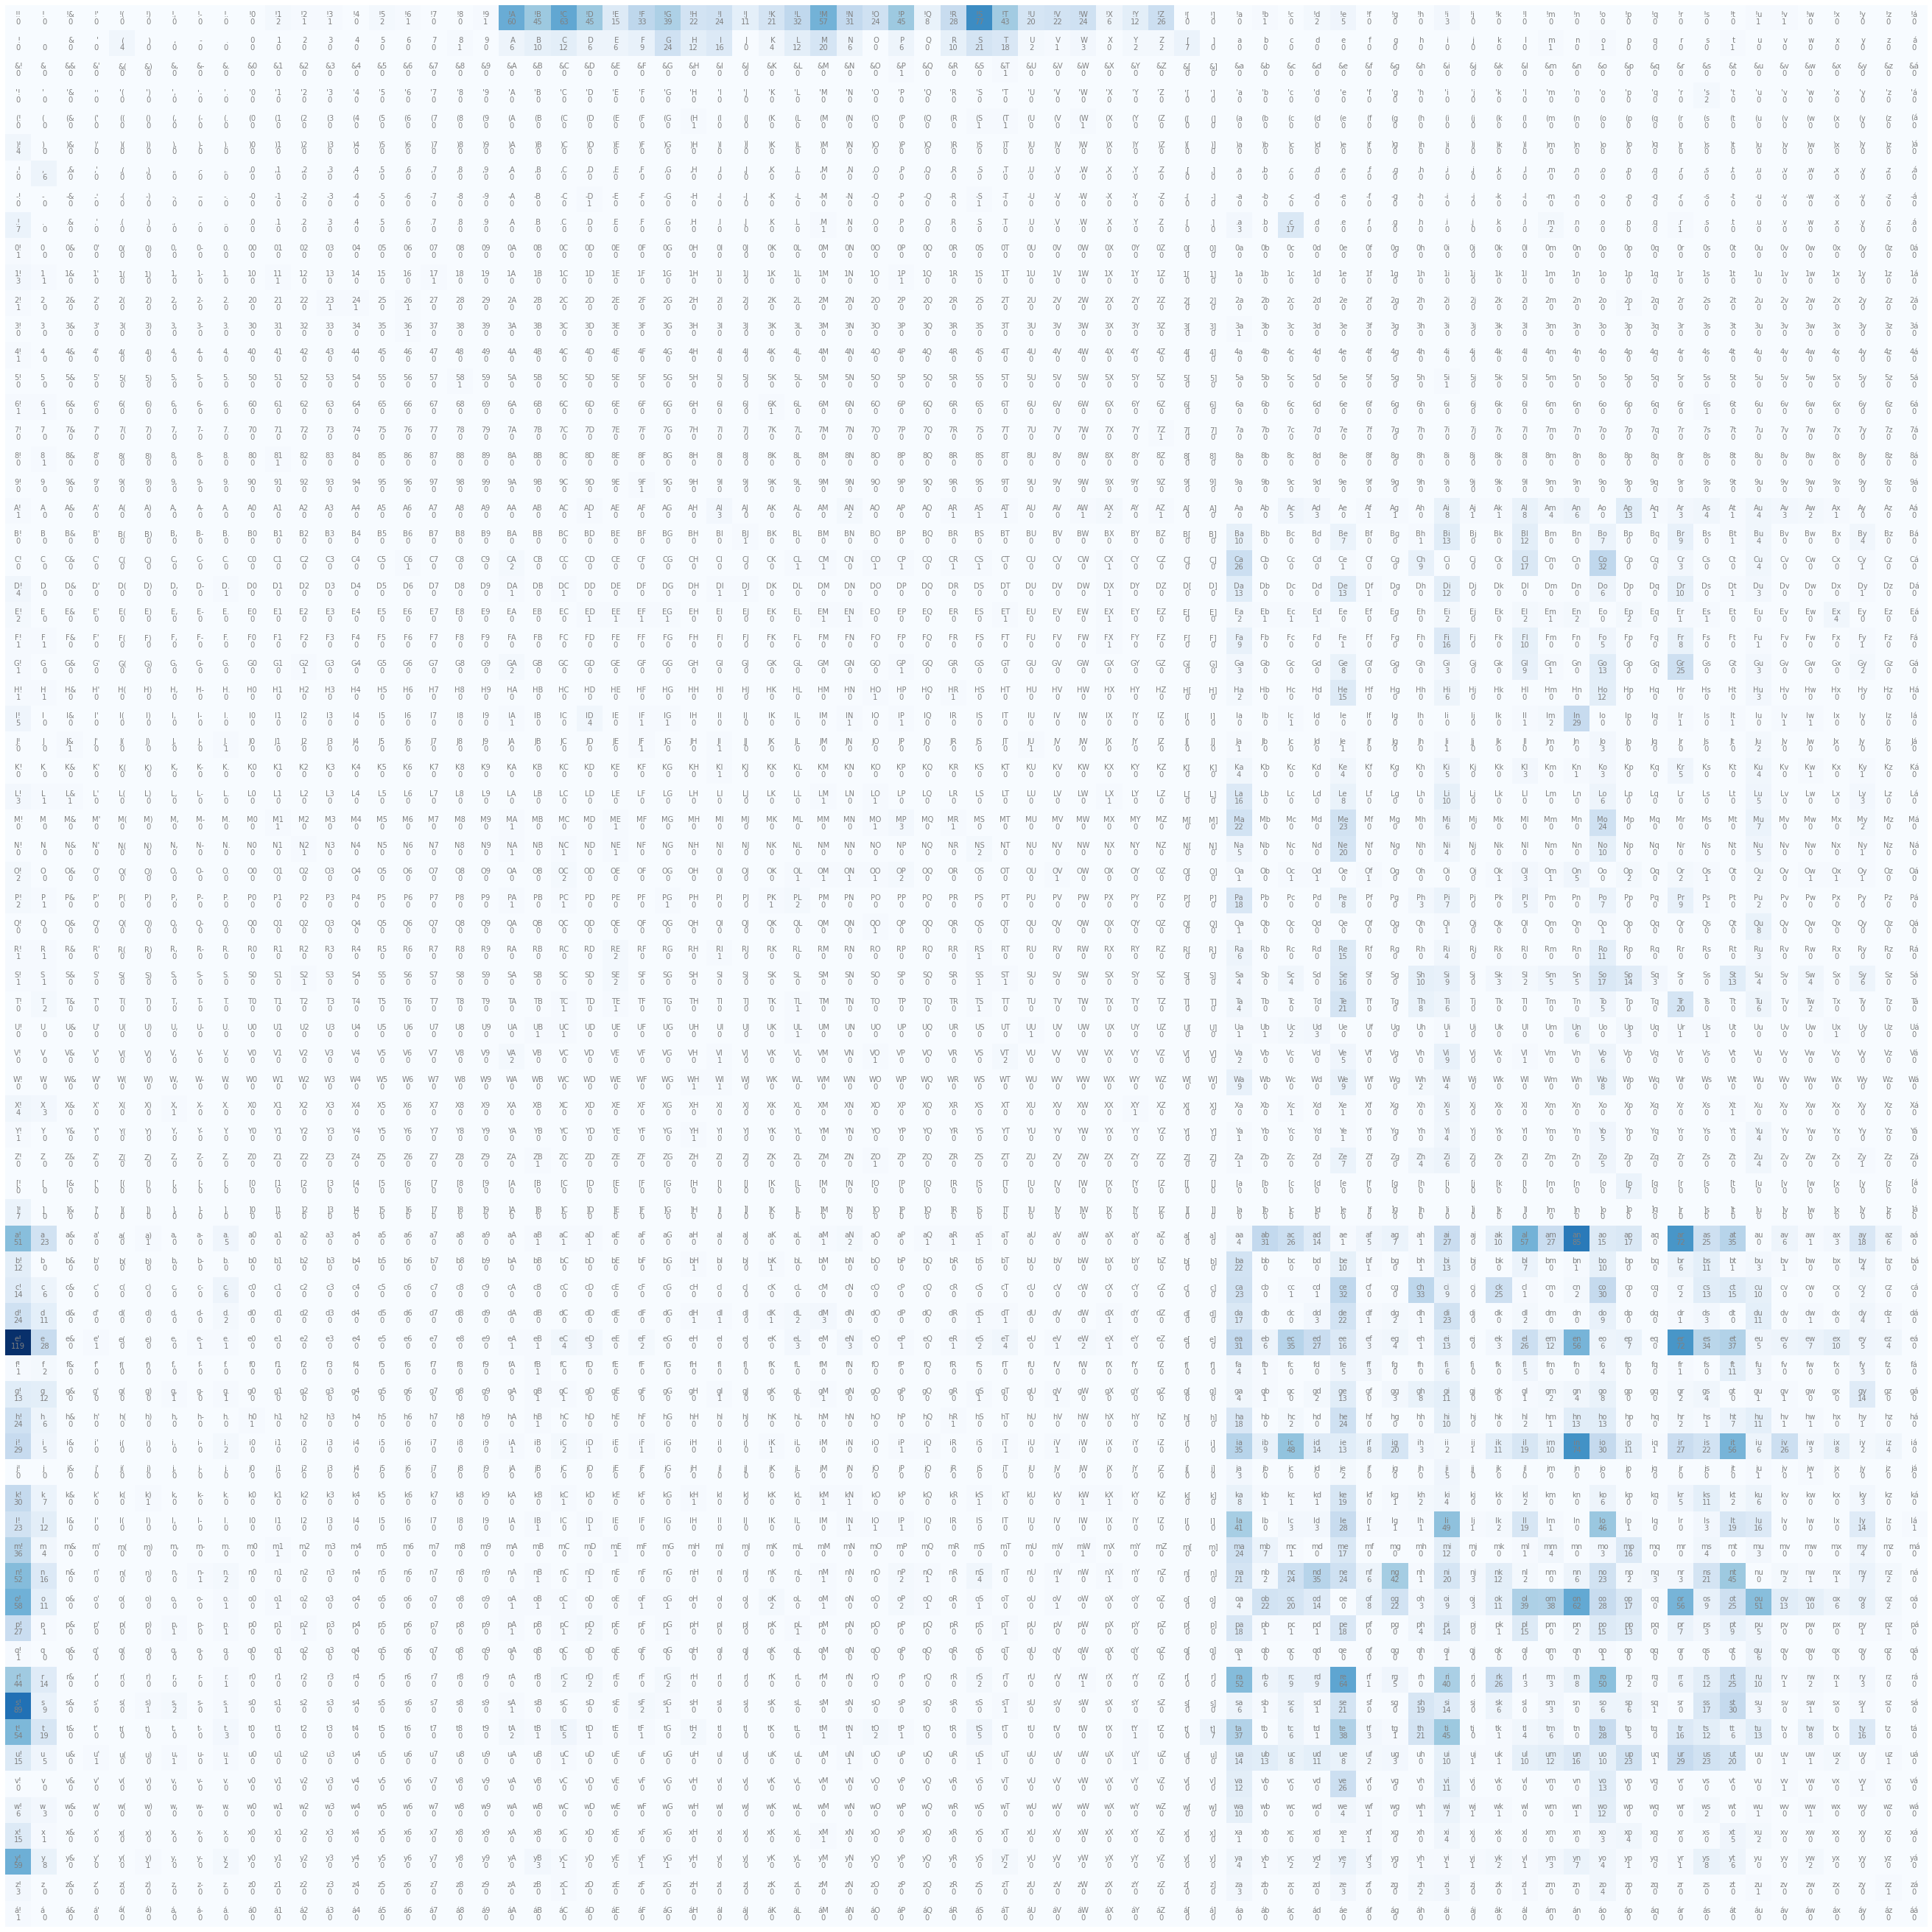

In [267]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(48,48))
plt.imshow(N, cmap='Blues')
for i in range(len(stoi)):
  for j in range(len(stoi)):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
    plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [268]:
N[0]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  1,  1,  0,  2,  1,  0,  0,
         1, 60, 45, 63, 45, 15, 33, 39, 22, 24, 11, 21, 32, 57, 31, 24, 45,  8,
        28, 77, 43, 20, 22, 24,  6, 12, 26,  0,  0,  0,  1,  0,  2,  5,  0,  0,
         0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,
         0,  0], dtype=torch.int32)

In [269]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0023, 0.0012, 0.0012, 0.0000, 0.0023, 0.0012, 0.0000, 0.0000,
        0.0012, 0.0703, 0.0527, 0.0738, 0.0527, 0.0176, 0.0386, 0.0457, 0.0258,
        0.0281, 0.0129, 0.0246, 0.0375, 0.0667, 0.0363, 0.0281, 0.0527, 0.0094,
        0.0328, 0.0902, 0.0504, 0.0234, 0.0258, 0.0281, 0.0070, 0.0141, 0.0304,
        0.0000, 0.0000, 0.0000, 0.0012, 0.0000, 0.0023, 0.0059, 0.0000, 0.0000,
        0.0000, 0.0035, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0012, 0.0012, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

In [270]:
g = torch.Generator().manual_seed(2147683647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'K'

In [271]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [272]:
g = torch.Generator().manual_seed(2147683647)

for i in range(50):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

Kb!
AAil TroceSIsBiplanh!
Ca9UrrsicIhipzDvazzCa!
Ric IzqCZifNiamhun!
Gin Hol5]S0yBMoua E3)Dedynop1AureNX''a!
Glo!
ng Ten8ClraisaouNjig!
N'YWerl Tre!
Sont!
SQQXDMla STr!
Days!
Norw,Die!
IDHw)JU5Py!
RSpineW[y.!
SoHO BrdAfili!
6wkogs FreDento Gh!
Aprablol!
CHVoi.conditzCoxyeckumyfR1q!
ASerankVágQ1mQQ4xRd]uterksoo5ExJSys!
Aplhyw2E5]!
Z&alouliknag0pGd!
Y]totlaRa,]j-zXIne!
RO0Kras!
Baymas!
3es!
RJ6Pine Ig(fFWJ LechWerbanily.4ecod!
Gomapmp.Wu!
etm!
Wat!
Te!
R9it Uc.anrc0pzp!
Lq'!
Erold6Radantast!
Nrk!
YHoa[3][ctss!
M1 ewNum!
O1WMowetSororpanVe!
Sirg67booCvJ2R'ágl!
Supico CPMx1j9Ycern0HunogpessF6 NUbsofRoururages!
Ram!
lak!
Name!
Q54ee FAwhti]covarpoobalodupitymufc!
HUNDerouth4IncLK831ZeOaw,!
Smaroun!
VchgoRjueCooDYetam!
ANeivesh!
C)y3ZbHS1Paciailolong3WheDXkecab!
Zk)fNoue YgX,.Me!
VixDTrucaiabecPrGocOq'08Sal Fwithenvolend4y!


In [273]:
log_likelihood = 0.0
cnt = 0
for n in names:
# for n in ['Hardik']:
  chs = ['!'] + list(n) + ['!']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    cnt += 1
    # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/cnt}')

log_likelihood=tensor(-24197.8945)
nll=tensor(24197.8945)
2.9309465885162354


In [274]:
xs, ys = [], []

for n in names:
  chs = ['!'] + list(n) + ['!']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [275]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=len(stoi)).float()

In [276]:
xenc.shape

torch.Size([8256, 74])

In [277]:
xenc.dtype

torch.float32

In [278]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(stoi), len(stoi)), generator=g)
xenc @ W

tensor([[ 1.5674, -0.2373, -0.0274,  ...,  1.5160, -1.0447, -0.6641],
        [ 0.7896, -0.6847, -0.4240,  ..., -1.9770,  0.8628,  1.4392],
        [ 0.6626,  0.4339, -0.3701,  ..., -0.8869,  1.1494, -0.7259],
        ...,
        [ 1.5321, -1.0163,  0.6591,  ...,  0.6715,  0.0233,  0.0698],
        [ 0.7918,  0.7271,  0.6531,  ..., -0.5777, -1.3386, -0.3019],
        [-0.3349,  1.3562, -0.4406,  ...,  1.6704,  0.3348, -0.7428]])

In [279]:
logits = xenc @ W # log-counts
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0325, 0.0053, 0.0066,  ..., 0.0308, 0.0024, 0.0035],
        [0.0151, 0.0035, 0.0045,  ..., 0.0009, 0.0163, 0.0289],
        [0.0154, 0.0122, 0.0055,  ..., 0.0033, 0.0250, 0.0038],
        ...,
        [0.0320, 0.0025, 0.0134,  ..., 0.0135, 0.0071, 0.0074],
        [0.0195, 0.0183, 0.0170,  ..., 0.0050, 0.0023, 0.0065],
        [0.0057, 0.0307, 0.0051,  ..., 0.0420, 0.0111, 0.0038]])

In [280]:
probs.shape

torch.Size([8256, 74])

In [281]:
probs[0].sum()

tensor(1.0000)

In [282]:
nlls = torch.zeros(len(xs))
for i in range(len(xs))[:1]:
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label index
  p = probs[i, y]
  logp = torch.log(p)
  nll = -logp
  nlls[i] = nll

print('average negative log likelihood, i.e. loss =', nlls.mean().item())

average negative log likelihood, i.e. loss = 0.0006621329230256379


In [283]:
# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(stoi), len(stoi)), generator=g, requires_grad=True)

In [284]:
# gradient descrnt
for k in range(100):
  xenc = F.one_hot(xs, num_classes=len(stoi)).float() # input to the network: one-hot encoding
  logits = xenc @ W # predit log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilties for next character
  loss = -probs[torch.arange(len(xs)), ys].log().mean() + 0.01 * (W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set gradient to zero
  loss.backward()

  W.data += -50 * W.grad

4.782886505126953
4.5994110107421875
4.441869735717773
4.303969860076904
4.182790756225586
4.075746059417725
3.980872392654419
3.8968751430511475
3.8227343559265137
3.757431745529175
3.6998634338378906
3.6488709449768066
3.603347063064575
3.562343120574951
3.5251171588897705
3.4911017417907715
3.4598610401153564
3.4310479164123535
3.4043781757354736
3.379613161087036
3.3565526008605957
3.3350253105163574
3.3148860931396484
3.2960095405578613
3.278284788131714
3.261618137359619
3.2459237575531006
3.2311244010925293
3.2171521186828613
3.203944206237793
3.1914429664611816
3.1795966625213623
3.1683568954467773
3.157679319381714
3.147523880004883
3.1378531455993652
3.128632068634033
3.119830369949341
3.1114184856414795
3.103369951248169
3.09566068649292
3.088268280029297
3.081171989440918
3.0743541717529297
3.067796468734741
3.0614826679229736
3.0553994178771973
3.049532413482666
3.043869972229004
3.038400173187256
3.0331130027770996
3.027998685836792
3.023047924041748
3.0182533264160156
3.

In [285]:
# sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=len(stoi)).float()
    logits = xenc @ W
    counts = logits.exp()
    p = counts / counts.sum(1, keepdims=True)

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

Prm!
Avo!
PjeetitoxEOr!
Molir3Gr8FR Relumix!
Tol!
SRVkKice!
ENare HalorilthanagMusLo!
GSLu!
BZamur Inde MolopQFiolo!
Ba!


Source: [The spelled-out intro to language modeling: building makemore | Andrej Karpathy](https://www.youtube.com/watch?v=PaCmpygFfXo)

In [286]:
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for n in names:
  context = [0] * block_size
  # print(n)
  for ch in n + '!':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [287]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([8256, 3]), torch.int64, torch.Size([8256]), torch.int64)

In [308]:
C = torch.rand((len(stoi), 2))

In [309]:
emb = C[X]
emb.shape

torch.Size([8256, 3, 2])

In [310]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [311]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([8256, 6])

In [312]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([8256, 6])

In [313]:
emb.view(8256, 6).shape

torch.Size([8256, 6])

In [314]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h.shape

torch.Size([8256, 100])

In [315]:
W2 = torch.randn((100, len(stoi)))
b2 = torch.randn(len(stoi))
parameters = [C, W1, b1, W2, b2]

In [316]:
sum(p.nelement() for p in parameters) # number of parameters in total

8322

In [317]:
logits = h @ W2 + b2
logits.shape

torch.Size([8256, 74])

In [318]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs.shape

torch.Size([8256, 74])

In [319]:
loss = -probs[torch.arange(8256), Y].log().mean()
loss

tensor(17.2492)

In [320]:
loss = F.cross_entropy(logits, Y)
loss

tensor(17.2492)

In [321]:
for p in parameters:
  p.requires_grad = True

In [322]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre 

In [324]:
lri = []
lossi = []
for i in range(1000):
  # minibatch construct
  batch_ix = torch.randint(0, X.shape[0], (32,))
  # forward pass
  emb = C[X[batch_ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[batch_ix])
  # print(loss.item())
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # update
  # lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad
  # track stats
  # lri.append(lr)
  # lossi.append(loss.item())

print(loss.item())

3.3012189865112305


In [305]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(10557.3125, grad_fn=<NllLossBackward0>)

Source: [Building makemore Part 2: MLP | Andrej Karpathy](https://www.youtube.com/watch?v=TCH_1BHY58I)